In [4]:
DATA_DIR = "./bbc/"

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files

## LOADING THE DATA

In [17]:
data = load_files(DATA_DIR, encoding = "latin1")
y = data.target


## PLOTING THE DISTRIBUTION

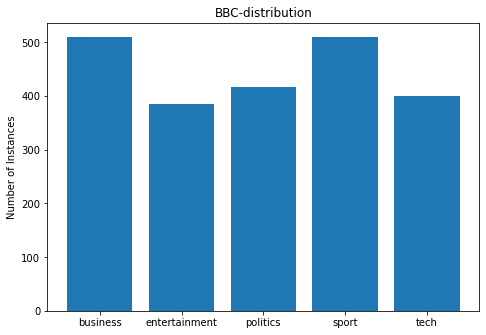

In [13]:
labels, counts = np.unique(y, return_counts=True)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data.target_names, counts)
ax.set_ylabel('Number of Instances')
ax.set_title('BBC-distribution')

plt.savefig("BBC-distribution.pdf", bbox_inches = "tight")

## PREPROSSESSING THE DATA

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data.data)

## SPLITTING THE DATA

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

## TRAINING THE DATA - SMOOTHING = 1

In [39]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

## TRAINING THE DATA - SMOOTHING = 0.0001

In [40]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB(alpha=0.0001)
clf1.fit(X_train, y_train)

MultinomialNB(alpha=0.0001)

## TRAINING THE DATA - SMOOTHING = 0.9

In [41]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB(alpha=0.9)
clf2.fit(X_train, y_train)

MultinomialNB(alpha=0.9)

##  CONFUSION MATRICES

In [51]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cMatrix = confusion_matrix(y_test, y_pred)

In [76]:
from sklearn.metrics import confusion_matrix
y_pred1 = clf1.predict(X_test)
cMatrix1 = confusion_matrix(y_test, y_pred1)

In [75]:
from sklearn.metrics import confusion_matrix
y_pred2 = clf2.predict(X_test)
cMatrix2 = confusion_matrix(y_test, y_pred2)

## CLASSIFICATION REPORTS

In [54]:
from sklearn.metrics import classification_report
cReport = classification_report(y_test, y_pred, target_names=data.target_names)

In [58]:
from sklearn.metrics import classification_report
cReport1 = classification_report(y_test, y_pred1, target_names=data.target_names)

In [59]:
from sklearn.metrics import classification_report
cReport2 = classification_report(y_test, y_pred2, target_names=data.target_names)

## ACCURACIES AND F1s

In [63]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, y_pred) * 100
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

In [64]:
from sklearn.metrics import accuracy_score, f1_score
accuracy1 = accuracy_score(y_test, y_pred1) * 100
f1_macro1 = f1_score(y_test, y_pred1, average='macro')
f1_weighted1 = f1_score(y_test, y_pred1, average='weighted')

In [66]:
from sklearn.metrics import accuracy_score, f1_score
accuracy2 = accuracy_score(y_test, y_pred2) * 100
f1_macro2 = f1_score(y_test, y_pred2, average='macro')
f1_weighted2 = f1_score(y_test, y_pred2, average='weighted')

## PRIORS

In [67]:
labels, counts = np.unique(data.target, return_counts=True)
labels_str = np.array(data.target_names)[labels]
labels_count = dict(zip(labels_str, counts))
total = np.sum(counts)
prior_b = labels_count['business']/total 
prior_e = labels_count['entertainment']/total
prior_p = labels_count['politics']/total
prior_s = labels_count['sport']/total
prior_t = labels_count['tech']/total

## TOTAL WORDS IN EACH CLASS

In [68]:
a = X.toarray()
words_by_class = np.zeros_like(np.arange(5))
zero_f_by_class = np.zeros_like(np.arange(5))
for i in range(y.shape[0]):
    if y[i] == 0:
        words_by_class[0] += np.sum(a[i])
        zero_f_by_class[0] += np.count_nonzero(a[i]==0) 
    elif y[i] == 1:
        words_by_class[1] += np.sum(a[i])
        zero_f_by_class[1] += np.count_nonzero(a[i]==0) 
    elif y[i] == 2:
        words_by_class[2] += np.sum(a[i])
        zero_f_by_class[2] += np.count_nonzero(a[i]==0) 
    elif y[i] == 3:
        words_by_class[3] += np.sum(a[i])
        zero_f_by_class[3] += np.count_nonzero(a[i]==0) 
    elif y[i] == 4:
        words_by_class[4] += np.sum(a[i])
        zero_f_by_class[4] += np.count_nonzero(a[i]==0)

## % WITH FREQUENCY 0 IN EACH CLASS

In [69]:
zero_percentages = []
for i in range(5):
    zero_percentages.append(zero_f_by_class[i]/(a.shape[1]*counts[i]) * 100)

## # AND % OF WORDS WITH FREQUENCY 1

In [70]:
nb_f_one = np.count_nonzero(a==1)
percentage_f_one = nb_f_one/(a.shape[0]*a.shape[1])*100

## FAV WORDS

In [71]:
#22865: royal
#23400: scottish

rows_sums = np.sum(a, axis = 0)
prob_favs = [rows_sums[22865]/np.sum(words_by_class), rows_sums[23400]/np.sum(words_by_class)]
log_prob_favs = np.log10(prob_favs)

## FILE OUTPUT

In [72]:
stars = '***************************************************************************\n\n'
with open('bbc-performance.txt', 'a') as f:
#     f.write("%s(a) MultinomialNB default values, try 1\n\n" % stars)
    f.write("%s(b) CONFUSION MATIRX\n\n" % stars)
    np.savetxt(f, cMatrix, fmt ='%3.d', delimiter='     ')
    f.write("\n\n")
    f.write("%s(c) CLASSIFICATION REPORT\n\n%s\n\n" % (stars, cReport))
    f.write("%s(d)\n\nACCURACY = %.2f%%\n\nMACRO-AVERAGE F1 = %.2f\n\nWEIGHTED-AVERAGE F1 = %.2f\n\n" % (stars, accuracy, f1_macro, f1_weighted))
#     f.write("%s(e) PRIORS\n\n%s\n\nTOTAL = %.d\n\nBUSINESS PRIOR = %.2f\n\nENTERTAINMENT PRIOR = %.2f\n\nPOLITICS PRIOR = %.2f\n\nSPORT PRIOR = %.2f\n\nTECH PRIOR = %.2f\n\n" % (stars, labels_count, total, prior_b, prior_e, prior_p, prior_s, prior_t))
#     f.write("%s(f) VOCABULARY SIZE\n\nWhen we used the Countvectorizer, it did not take duplicates.\nWe ended up with an array where the rows represented the documents and the columns represented the words.\nTherefore, in order to calculate the size of the vocabulary, we count how many columns the array has.\n\nVOCABULARY SIZE = %.d\n\n" % (stars, X.shape[1]))
#     f.write("%s(g) NUMBER OF WORD-TOKENS IN EACH CLASS\n\nBUSINESS = %d\n\nENTERTAINMENT = %d\n\nPOLITICS = %d\n\nSPORTS = %d\n\nTECH = %d\n\n" % (stars, words_by_class[0], words_by_class[1], words_by_class[2], words_by_class[3], words_by_class[4]))
#     f.write("%s(h) NUMBER OF WORD-TOKENS IN THE ENTIRE CORPUS\n\nCOUNT = %d\n\n" % (stars, np.sum(words_by_class)))
#     f.write("%s(i) NUMBER AND PERCENTAGE OF WORD | FRENQUENCY = 0, FOR EACH CLASS\n\nBUSINESS = %d --> %.2f%%\n\nENTERTAINMENT = %d --> %.2f%%\n\nPOLITICS = %d --> %.2f%%\n\nSPORTS = %d --> %.2f%%\n\nTECH = %d --> %.2f%%\n\n" % (stars, zero_f_by_class[0], zero_percentages[0], zero_f_by_class[1], zero_percentages[1], zero_f_by_class[2], zero_percentages[2], zero_f_by_class[3], zero_percentages[3], zero_f_by_class[4], zero_percentages[4]))
#     f.write("%s(j) NUMBER AND PERCENTAGE OF WORD | FRENQUENCY = 1\n\nCOUNT = %d --> %.2f%%\n\n" % (stars, nb_f_one, percentage_f_one))
#     f.write("%s(k) FAV WORDS\n\n1. royal (index: 22865) --> log_prob = %.2f\n\n2. scottish (index: 23400) --> log_prob = %.2f\n\n" % (stars, log_prob_favs[0], log_prob_favs[1]))
    
    #---------------------------------------------------------------------------------------------------------------------
    
#     f.write("%s(a) MultinomialNB default values, try 2\n\n" % stars)
    f.write("%s(b) CONFUSION MATIRX\n\n" % stars)
    np.savetxt(f, cMatrix, fmt ='%3.d', delimiter='     ')
    f.write("\n\n")
    f.write("%s(c) CLASSIFICATION REPORT\n\n%s\n\n" % (stars, cReport))
    f.write("%s(d)\n\nACCURACY = %.2f%%\n\nMACRO-AVERAGE F1 = %.2f\n\nWEIGHTED-AVERAGE F1 = %.2f\n\n" % (stars, accuracy, f1_macro, f1_weighted))
#     f.write("%s(e) PRIORS\n\n%s\n\nTOTAL = %.d\n\nBUSINESS PRIOR = %.2f\n\nENTERTAINMENT PRIOR = %.2f\n\nPOLITICS PRIOR = %.2f\n\nSPORT PRIOR = %.2f\n\nTECH PRIOR = %.2f\n\n" % (stars, labels_count, total, prior_b, prior_e, prior_p, prior_s, prior_t))
#     f.write("%s(f) VOCABULARY SIZE\n\nWhen we used the Countvectorizer, it did not take duplicates.\nWe ended up with an array where the rows represented the documents and the columns represented the words.\nTherefore, in order to calculate the size of the vocabulary, we count how many columns the array has.\n\nVOCABULARY SIZE = %.d\n\n" % (stars, X.shape[1]))
#     f.write("%s(g) NUMBER OF WORD-TOKENS IN EACH CLASS\n\nBUSINESS = %d\n\nENTERTAINMENT = %d\n\nPOLITICS = %d\n\nSPORTS = %d\n\nTECH = %d\n\n" % (stars, words_by_class[0], words_by_class[1], words_by_class[2], words_by_class[3], words_by_class[4]))
#     f.write("%s(h) NUMBER OF WORD-TOKENS IN THE ENTIRE CORPUS\n\nCOUNT = %d\n\n" % (stars, np.sum(words_by_class)))
#     f.write("%s(i) NUMBER AND PERCENTAGE OF WORD | FRENQUENCY = 0, FOR EACH CLASS\n\nBUSINESS = %d --> %.2f%%\n\nENTERTAINMENT = %d --> %.2f%%\n\nPOLITICS = %d --> %.2f%%\n\nSPORTS = %d --> %.2f%%\n\nTECH = %d --> %.2f%%\n\n" % (stars, zero_f_by_class[0], zero_percentages[0], zero_f_by_class[1], zero_percentages[1], zero_f_by_class[2], zero_percentages[2], zero_f_by_class[3], zero_percentages[3], zero_f_by_class[4], zero_percentages[4]))
#     f.write("%s(j) NUMBER AND PERCENTAGE OF WORD | FRENQUENCY = 1\n\nCOUNT = %d --> %.2f%%\n\n" % (stars, nb_f_one, percentage_f_one))
#     f.write("%s(k) FAV WORDS\n\n1. royal (index: 22865) --> log_prob = %.2f\n\n2. scottish (index: 23400) --> log_prob = %.2f\n\n" % (stars, log_prob_favs[0], log_prob_favs[1]))

    #---------------------------------------------------------------------------------------------------------------------
    
#     f.write("%s(a) MultinomialNB default values, smoothing = 0.0001\n\n" % stars)
    f.write("%s(b) CONFUSION MATIRX\n\n" % stars)
    np.savetxt(f, cMatrix1, fmt ='%3.d', delimiter='     ')
    f.write("\n\n")
    f.write("%s(c) CLASSIFICATION REPORT\n\n%s\n\n" % (stars, cReport1))
    f.write("%s(d)\n\nACCURACY = %.2f%%\n\nMACRO-AVERAGE F1 = %.2f\n\nWEIGHTED-AVERAGE F1 = %.2f\n\n" % (stars, accuracy1, f1_macro1, f1_weighted1))
#     f.write("%s(e) PRIORS\n\n%s\n\nTOTAL = %.d\n\nBUSINESS PRIOR = %.2f\n\nENTERTAINMENT PRIOR = %.2f\n\nPOLITICS PRIOR = %.2f\n\nSPORT PRIOR = %.2f\n\nTECH PRIOR = %.2f\n\n" % (stars, labels_count, total, prior_b, prior_e, prior_p, prior_s, prior_t))
#     f.write("%s(f) VOCABULARY SIZE\n\nWhen we used the Countvectorizer, it did not take duplicates.\nWe ended up with an array where the rows represented the documents and the columns represented the words.\nTherefore, in order to calculate the size of the vocabulary, we count how many columns the array has.\n\nVOCABULARY SIZE = %.d\n\n" % (stars, X.shape[1]))
#     f.write("%s(g) NUMBER OF WORD-TOKENS IN EACH CLASS\n\nBUSINESS = %d\n\nENTERTAINMENT = %d\n\nPOLITICS = %d\n\nSPORTS = %d\n\nTECH = %d\n\n" % (stars, words_by_class[0], words_by_class[1], words_by_class[2], words_by_class[3], words_by_class[4]))
#     f.write("%s(h) NUMBER OF WORD-TOKENS IN THE ENTIRE CORPUS\n\nCOUNT = %d\n\n" % (stars, np.sum(words_by_class)))
#     f.write("%s(i) NUMBER AND PERCENTAGE OF WORD | FRENQUENCY = 0, FOR EACH CLASS\n\nBUSINESS = %d --> %.2f%%\n\nENTERTAINMENT = %d --> %.2f%%\n\nPOLITICS = %d --> %.2f%%\n\nSPORTS = %d --> %.2f%%\n\nTECH = %d --> %.2f%%\n\n" % (stars, zero_f_by_class[0], zero_percentages[0], zero_f_by_class[1], zero_percentages[1], zero_f_by_class[2], zero_percentages[2], zero_f_by_class[3], zero_percentages[3], zero_f_by_class[4], zero_percentages[4]))
#     f.write("%s(j) NUMBER AND PERCENTAGE OF WORD | FRENQUENCY = 1\n\nCOUNT = %d --> %.2f%%\n\n" % (stars, nb_f_one, percentage_f_one))
#     f.write("%s(k) FAV WORDS\n\n1. royal (index: 22865) --> log_prob = %.2f\n\n2. scottish (index: 23400) --> log_prob = %.2f\n\n" % (stars, log_prob_favs[0], log_prob_favs[1]))
    
    #---------------------------------------------------------------------------------------------------------------------
    
#     f.write("%s(a) MultinomialNB default values, smoothing = 0.9\n\n" % stars)
    f.write("%s(b) CONFUSION MATIRX\n\n" % stars)
    np.savetxt(f, cMatrix2, fmt ='%3.d', delimiter='     ')
    f.write("\n\n")
    f.write("%s(c) CLASSIFICATION REPORT\n\n%s\n\n" % (stars, cReport2))
    f.write("%s(d)\n\nACCURACY = %.2f%%\n\nMACRO-AVERAGE F1 = %.2f\n\nWEIGHTED-AVERAGE F1 = %.2f\n\n" % (stars, accuracy2, f1_macro2, f1_weighted2))
#     f.write("%s(e) PRIORS\n\n%s\n\nTOTAL = %.d\n\nBUSINESS PRIOR = %.2f\n\nENTERTAINMENT PRIOR = %.2f\n\nPOLITICS PRIOR = %.2f\n\nSPORT PRIOR = %.2f\n\nTECH PRIOR = %.2f\n\n" % (stars, labels_count, total, prior_b, prior_e, prior_p, prior_s, prior_t))
#     f.write("%s(f) VOCABULARY SIZE\n\nWhen we used the Countvectorizer, it did not take duplicates.\nWe ended up with an array where the rows represented the documents and the columns represented the words.\nTherefore, in order to calculate the size of the vocabulary, we count how many columns the array has.\n\nVOCABULARY SIZE = %.d\n\n" % (stars, X.shape[1]))
#     f.write("%s(g) NUMBER OF WORD-TOKENS IN EACH CLASS\n\nBUSINESS = %d\n\nENTERTAINMENT = %d\n\nPOLITICS = %d\n\nSPORTS = %d\n\nTECH = %d\n\n" % (stars, words_by_class[0], words_by_class[1], words_by_class[2], words_by_class[3], words_by_class[4]))
#     f.write("%s(h) NUMBER OF WORD-TOKENS IN THE ENTIRE CORPUS\n\nCOUNT = %d\n\n" % (stars, np.sum(words_by_class)))
#     f.write("%s(i) NUMBER AND PERCENTAGE OF WORD | FRENQUENCY = 0, FOR EACH CLASS\n\nBUSINESS = %d --> %.2f%%\n\nENTERTAINMENT = %d --> %.2f%%\n\nPOLITICS = %d --> %.2f%%\n\nSPORTS = %d --> %.2f%%\n\nTECH = %d --> %.2f%%\n\n" % (stars, zero_f_by_class[0], zero_percentages[0], zero_f_by_class[1], zero_percentages[1], zero_f_by_class[2], zero_percentages[2], zero_f_by_class[3], zero_percentages[3], zero_f_by_class[4], zero_percentages[4]))
#     f.write("%s(j) NUMBER AND PERCENTAGE OF WORD | FRENQUENCY = 1\n\nCOUNT = %d --> %.2f%%\n\n" % (stars, nb_f_one, percentage_f_one))
#     f.write("%s(k) FAV WORDS\n\n1. royal (index: 22865) --> log_prob = %.2f\n\n2. scottish (index: 23400) --> log_prob = %.2f\n\n" % (stars, log_prob_favs[0], log_prob_favs[1]))
    
    
f.close()